In [175]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_r as sim
from TO_sim.Utility import Create_Folder
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.gen_Distribution import Normal,Lorentzian
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from TO_sim.To_Draw import Draw_theoretical_wData as DD
import parmap
import pandas as pd
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm.notebook import tqdm
from scipy.signal import find_peaks

In [171]:
seed =10
N = 500
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega)
m = 6
t = np.arange(0,1000,0.1)
K = 3.5
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)

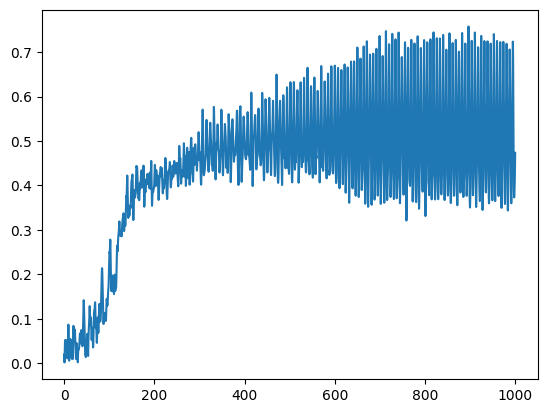

In [619]:
plt.plot(t,rs)

In [620]:
rpsi_s = 1/N*np.sum(np.exp(1j*theta),axis=1)
psi_s = np.angle(rpsi_s)
theta_treat = (theta + np.pi )  % (2*np.pi) - np.pi

In [621]:
sum_time = 500
diff_theta = theta - np.c_[[psi_s for i in range(N) ]].T
diff_theta_treat = (diff_theta+ np.pi )  % (2*np.pi) - np.pi
diff_theta_c = np.cumsum(diff_theta_treat,axis=0)
avg_diff_theta = (diff_theta_c[sum_time:]-diff_theta_c[:-sum_time])/sum_time
dtheta_c = np.cumsum(dtheta,axis=0)
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
sign = np.sign(diff_theta_treat)

Text(0.5, 1.0, "oscillator's sign")

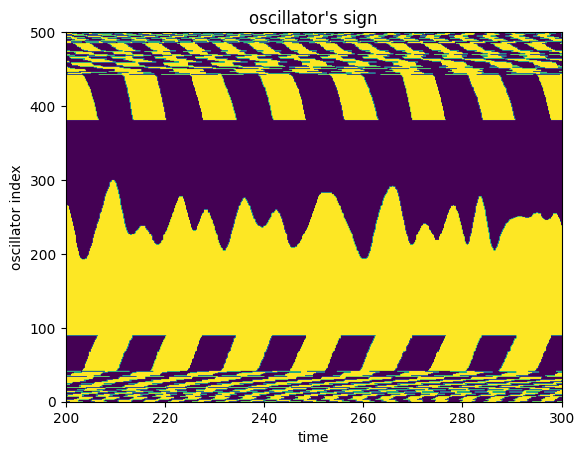

In [622]:
plt.imshow(sign[-500:].T,extent=([t[2000],t[3000],0,500]),aspect='auto')

plt.xlabel('time')
plt.ylabel('oscillator index')
plt.title('oscillator\'s sign')

Text(0.5, 0.95, 'K=3.5, m=6')

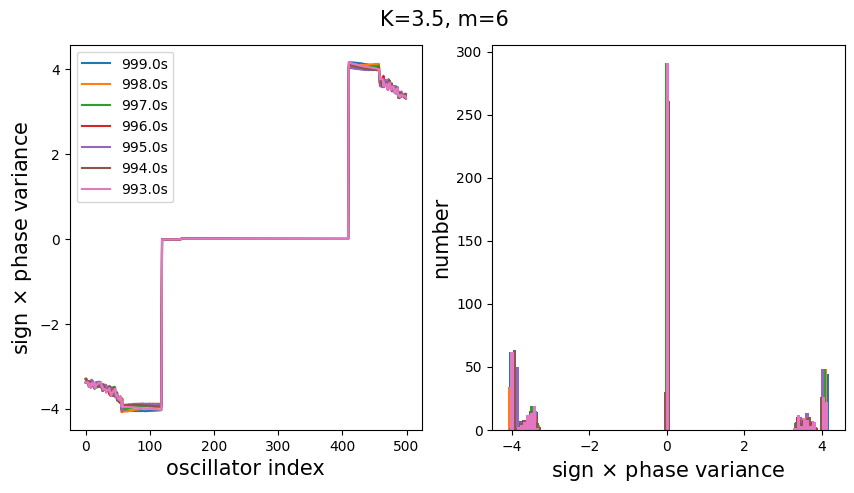

In [623]:
data = []
plt.figure(figsize= (10,5))
plt.subplot(121)

for i in range(10,80,10):
    sign_var = np.sign(diff_theta[-i])*np.var(diff_theta_treat[-(500+i):-(i)],axis=0)
    # sign_var = np.var(sign[-(500+i):-i],axis=0)
    
    # sign_var = np.sign(diff_theta[-i])*np.var(diff_theta_treat[-(500+i):-(i)],axis=0)
    plt.plot(sign_var,label = f'{t[-i]:.01f}s')
    
    # plt.plot(avg_dtheta[-i])
plt.xlabel('oscillator index',fontsize= 15)
plt.ylabel(r'sign $\times$ phase variance',fontsize= 15)
plt.legend()
plt.subplot(122)
for i in range(10,80,10):
    plt.hist(np.sign(diff_theta[-i])*np.var(diff_theta_treat[-(500+i):-(i)],axis=0),bins=100)
    
plt.xlabel(r'sign $\times$ phase variance',fontsize= 15)
plt.ylabel('number',fontsize= 15)
plt.suptitle(f'K={K}, m={m}',y=0.95,fontsize = 15)

(array([ 52.,  10.,   1.,   4.,   8.,   7.,  14.,  11.,  10.,   2.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 291.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   2.,   8.,   7.,   7.,  11.,   5.,   2.,   0.,   0.,  24.,
         24.]),
 array([-4.05237552, -3.97024904, -3.88812256, -3.80599607, -3.72386959,
        -3.6417431 , -3.55961662, -3.47749013, -3.39536365, -3.31323717,
        -3.23111068, -3.1489842 , -3.06685771, -2.98473123, -2.90260474,
        -2.82047826, -2.73835177, -2.65622529, -2.57409881, -2.49197232,
        -2.40984584, -2.32

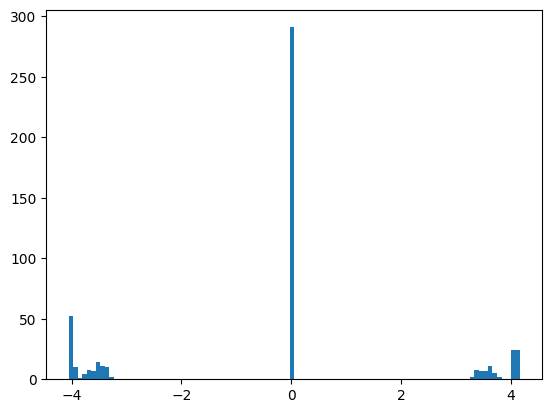

In [636]:
i =1
plt.hist(np.sign(diff_theta[-i])*np.var(diff_theta_treat[-(500+i):-(i)],axis=0),bins=100)

(array([ 84.,  13.,   5.,  15., 127., 184.,   8.,  12.,  11.,  41.]),
 array([-3.12713479e+00, -2.50149896e+00, -1.87586313e+00, -1.25022731e+00,
        -6.24591477e-01,  1.04435137e-03,  6.26680180e-01,  1.25231601e+00,
         1.87795184e+00,  2.50358767e+00,  3.12922349e+00]),
 <BarContainer object of 10 artists>)

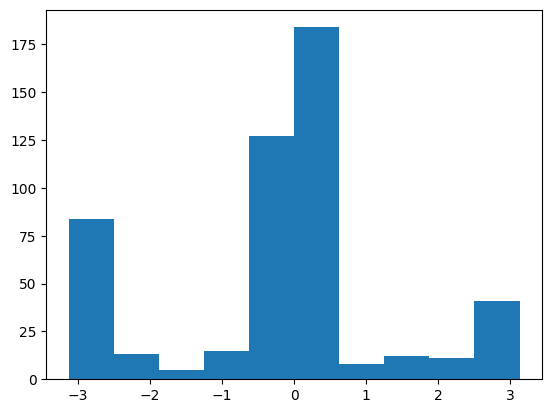

In [413]:
plt.hist(diff_theta_treat[-1])

(array([ 62.,   5.,  15.,  25.,  12.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 291.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.,  15.,  18.,   7.,   0.,  48.]),
 array([-4.05237552, -3.88812256, -3.72386959, -3.55961662, -3.39536365,
        -3.23111068, -3.06685771, -2.90260474, -2.73835177, -2.57409881,
        -2.40984584, -2.24559287, -2.0813399 , -1.91708693, -1.75283396,
        -1.58858099, -1.42432803, -1.26007506, -1.09582209, -0.93156912,
        -0.76731615, -0.60306318, -0.43881021, -0.27455724, -0.11030428,
         0.05394869,  0.21820166,  0.38245463,  0.5467076 ,  0.71096057,
         0.87521354,  1.03946651,  1.20371947,  1.36797244,  1.53222541,
         1.69647838,  1.86073135,  2.02498432,  2.18923729,  2.35349026,
         2.51774322,  2.68199619,  2.84624916,  3.01050213,  3.1747551 ,
 

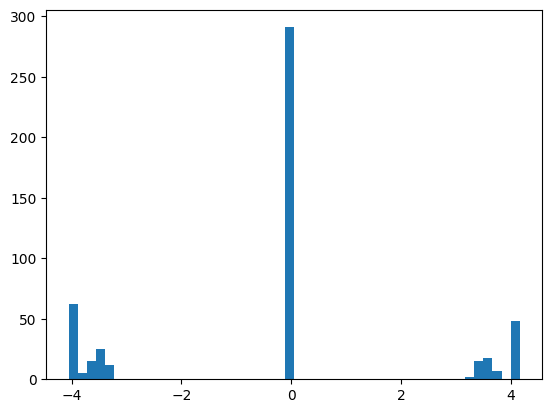

In [638]:
plt.hist(np.sign(diff_theta[-1])*np.var(diff_theta_treat[-(500+i):-(i)],axis=0),bins=50)

# 시간에 따른 그룹의 개수 확인

In [200]:
seed =10
N = 500
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega)
m = 6
t = np.arange(0,1000,0.1)
K = 3.5
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)
dtheta_c = np.cumsum(dtheta,axis=0)
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
diff_avg_dtheta = np.diff(avg_dtheta,axis=1)

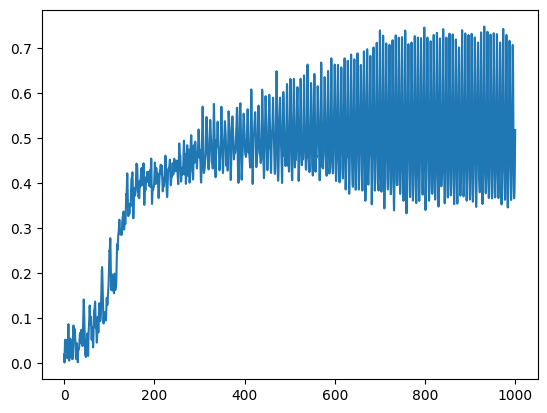

In [201]:
plt.plot(t,rs)

(-3.0, 3.0)

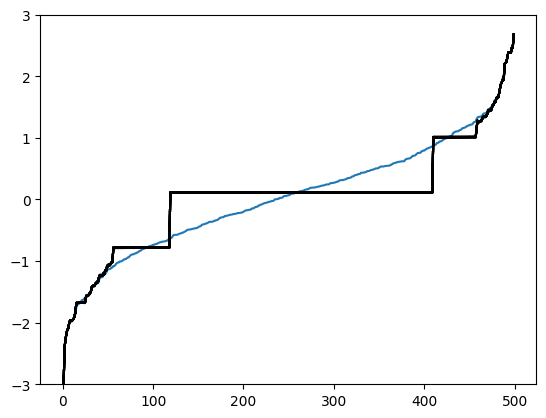

In [202]:
plt.plot(omega)
for i in range(1,100):
    plt.plot(avg_dtheta[-i],alpha=0.1,color='black')
    # plt.plot(avg_dtheta[-10*i])
plt.ylim(-3,3)

(-3.0, 3.0)

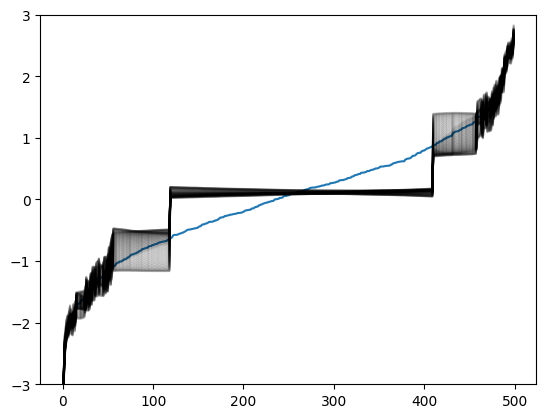

In [203]:
plt.plot(omega)
for i in range(1,100):
    plt.plot(dtheta[-i],alpha=0.1,color='black')
    # plt.plot(avg_dtheta[-10*i])
plt.ylim(-3,3)

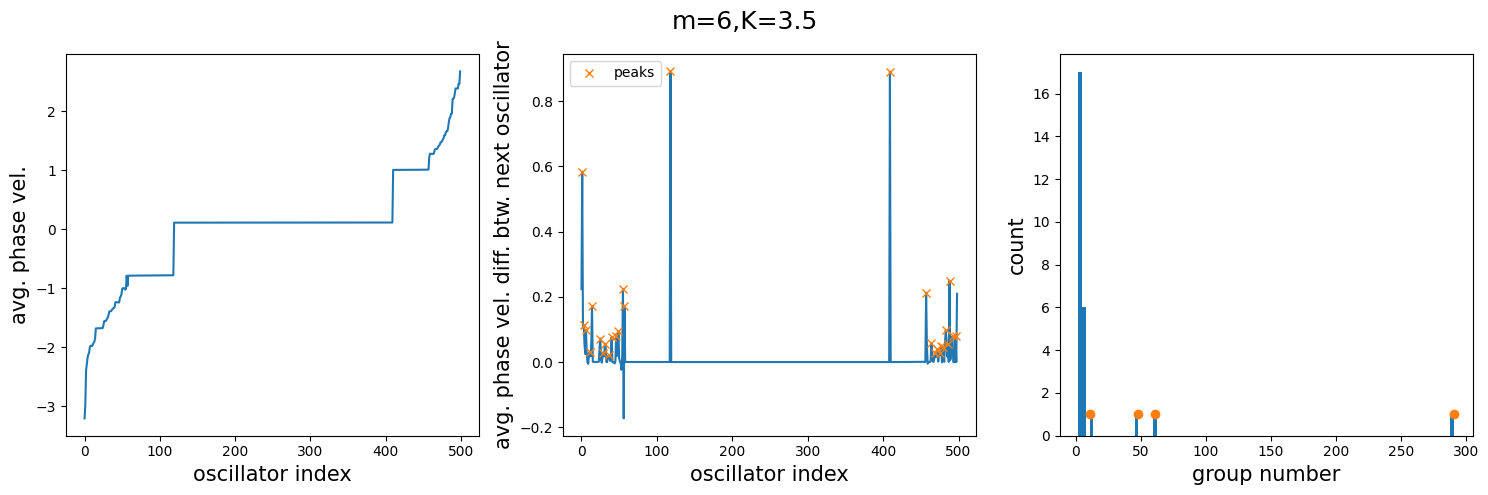

In [626]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(avg_dtheta[-1])
plt.xlabel('oscillator index',fontsize= 15)
plt.ylabel('avg. phase vel.', fontsize= 15)
plt.subplot(132)
diff_dtheta = diff_avg_dtheta[-1]
plt.plot(diff_dtheta)


peaks, _ = find_peaks(diff_dtheta, height=0.01)
plt.plot(peaks, diff_dtheta[peaks], "x",label='peaks')
plt.legend()
plt.xlabel('oscillator index',fontsize= 15)
plt.ylabel('avg. phase vel. diff. btw. next oscillator', fontsize= 15)
# plt.plot(np.zeros_like(diff_dtheta), "--", color="gray")

plt.subplot(133)
diff_peaks = np.sort(np.diff(peaks))[::-1]
plt.hist(diff_peaks,bins=100)

plt.scatter(diff_peaks[:4],[1,1,1,1],color='tab:orange')
plt.xlabel('group number',fontsize= 15)
plt.ylabel('count', fontsize= 15)
plt.suptitle(f'm={m},K={K}',fontsize= 18)
plt.tight_layout()

Text(0, 0.5, 'avg. phase vel.')

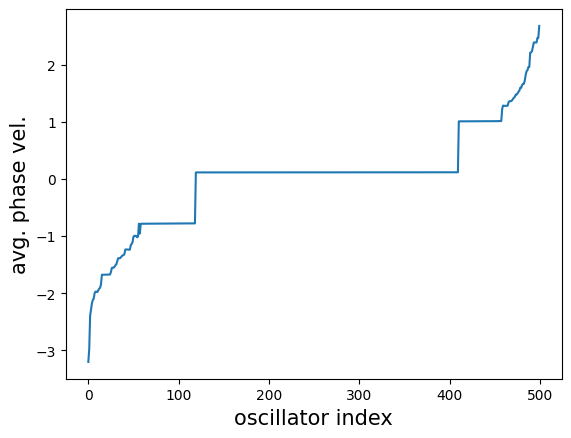

In [627]:
plt.plot(avg_dtheta[-1])
plt.xlabel('oscillator index',fontsize= 15)
plt.ylabel('avg. phase vel.', fontsize= 15)


In [267]:

num_data = []
for data in avg_dtheta[-500:]:
    diff_dtheta = np.diff(data)
    peaks, _ = find_peaks(diff_dtheta, height=0.01)
    num_data.append(np.diff(peaks))
main_ = []

for diff in num_data:
    # plt.hist(diff,bins=20)
    # print(diff[np.where(diff>5)])
    sort_re = np.sort(diff)[::-1]
    # sort_re = np.sort(diff)
    # print(sort_re)
    temp = []
    for i in sort_re[:5]:
        temp.append(i)
    for i in range(5- len(sort_re)):
        temp.append(np.NAN)
    main_.append(temp)

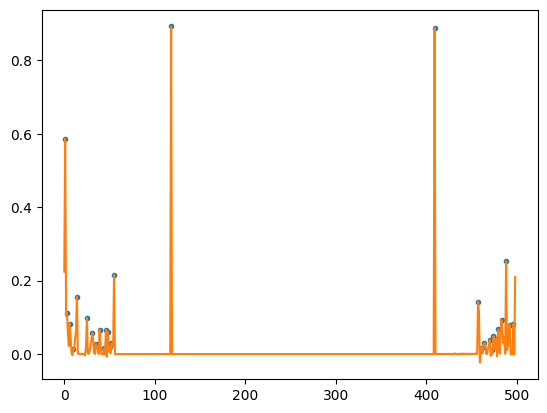

In [277]:
plt.plot(peaks,diff_dtheta[peaks],'.')
plt.plot(diff_dtheta)

In [278]:
peaks[np.argsort(diff)]

array([  1, 486, 477, 472, 470,  35,  37,  44,  46,  48,  50, 483, 474,
       461,  52,   3, 457,  31,  10, 479,   6, 488, 492,  39, 464,  25,
        14, 409,  55, 118])

Text(0, 0.5, 'order parameter ($r$)')

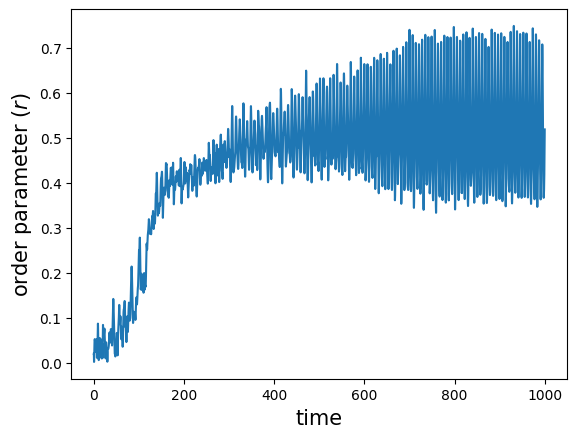

In [99]:
plt.plot(t,rs)
plt.xlabel('time',fontsize=15)
plt.ylabel(r'order parameter ($r$)',fontsize=15)

(0.0, 10.0)

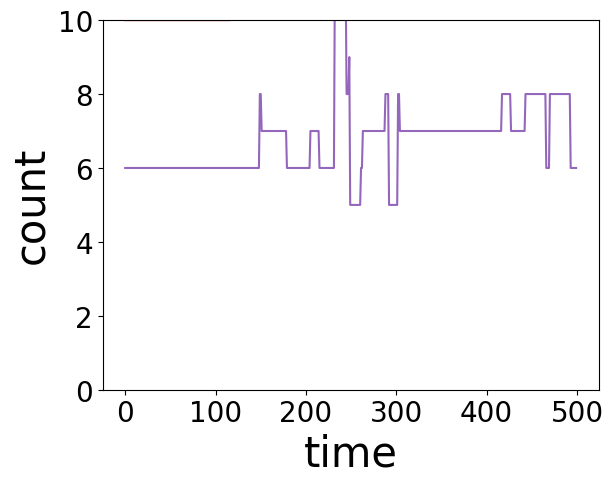

In [100]:
plt.plot(main_,label = ['main group',r'$2^{nd}$ group',r'$3^{rd}$ group',r'$4^{th}$ group',r'$5^{th}$ group'])
plt.xlabel('time',fontsize=30)
plt.ylabel('count',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.title(f'm={m},K={K}',fontsize= 18)
plt.ylim(0,10)
# plt.legend(fontsize=15,c)

In [101]:
main_[-1]

[291, 63, 48, 11, 6]

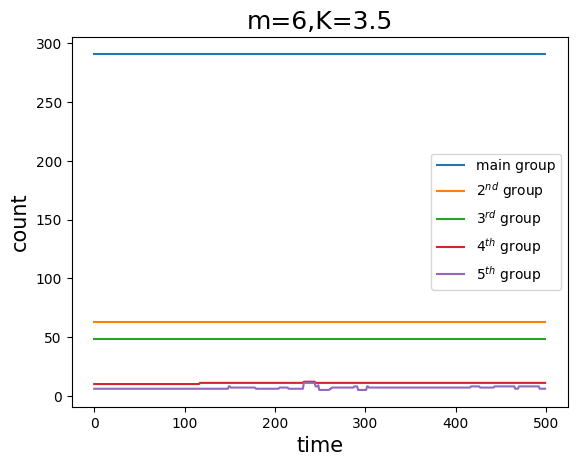

In [102]:
plt.plot(main_,label = ['main group',r'$2^{nd}$ group',r'$3^{rd}$ group',r'$4^{th}$ group',r'$5^{th}$ group'])
plt.xlabel('time',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.title(f'm={m},K={K}',fontsize= 18)

plt.legend()

## phase diagram

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from TO_sim.Utility import Create_Folder
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mK as mK
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2

from TO_sim.gen_Distribution import Normal
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from TO_sim.To_Draw import Draw_theoretical_wData as DD
import parmap
import pandas as pd
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm.notebook import tqdm
from scipy.signal import find_peaks

In [64]:
def get_groups(dtheta):
    sum_time = 500
    dtheta_c = np.cumsum(dtheta,axis=0)
    avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
    diff_avg_dtheta = np.diff(avg_dtheta,axis=1)
    num_data = []
    for data in avg_dtheta[-500:]:
        diff_dtheta = np.diff(data)
        peaks, _ = find_peaks(diff_dtheta, height=0.01)
        num_data.append(np.diff(peaks))
    groups = []

    for diff in num_data:
        sort_re = np.sort(diff)[::-1]
        temp = []
        for i in sort_re[:5]:
            temp.append(i)
        if len(sort_re) == 0:
            temp = [N,0,0,0,0]
        else:
            for i in range(5- len(sort_re)):
                temp.append(0)
        groups.append(temp)
    return groups

In [225]:
seed =10
N = 500
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega)
m = 6
t = np.arange(0,1000,0.1)
K = 3.5
theta, dtheta,rs = mK((m,K),N=N,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)
mean = lambda x :np.mean(x[-500:])
std  = lambda x :np.std(x[-500:])

In [30]:
dtheta.shape

(9999, 500)

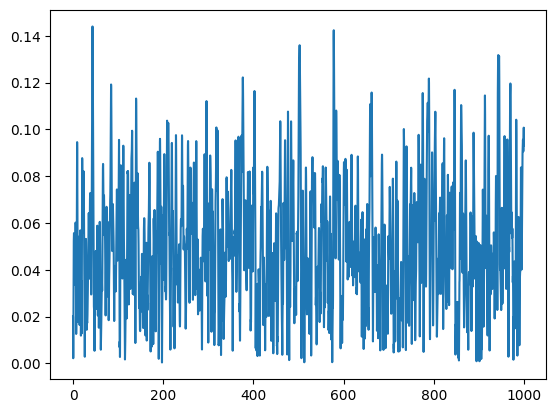

In [46]:
plt.plot(t,rs)

In [234]:
np.mean(get_groups(dtheta)[-500:],axis=0)
np.std(get_groups(dtheta)[-500:],axis=0)

array([0.        , 0.        , 0.        , 0.46554914, 1.03849121])

In [235]:
def make_meanr(K,m):
    theta, dtheta,rs = mf2(K,m=m,N=N,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)
    r = mean(rs)
    std_ = std(rs)
    g1,g2,g3,g4,g5 = np.mean(get_groups(dtheta)[-500:],axis=0)
    g1_std,g2_std,g3_std,g4_std,g5_std = np.std(get_groups(dtheta)[-500:],axis=0)
    return r,std_,g1,g2,g3,g4,g5,g1_std,g2_std,g3_std,g4_std,g5_std

In [245]:
func = lambda K,m: make_meanr(K,m)
K_ = np.vectorize(func)

In [467]:
Ks = np.arange(0,10,0.1)
ms = np.arange(0,6,0.2)
KK,MM = np.meshgrid(Ks,ms)

In [247]:
r,std_,g1,g2,g3,g4,g5,g1_std,g2_std,g3_std,g4_std,g5_std = K_(KK,MM)

In [152]:
Create_Folder('23.03.17 mesh2/')

In [444]:
import glob

In [453]:
file_name = glob.glob('23.03.17 mesh/*.npy')

In [456]:
file_name.sort()
file_name


['23.03.17 mesh/g1.npy',
 '23.03.17 mesh/g2.npy',
 '23.03.17 mesh/g3.npy',
 '23.03.17 mesh/g4.npy',
 '23.03.17 mesh/g5.npy',
 '23.03.17 mesh/r.npy',
 '23.03.17 mesh/std_.npy']

In [461]:
file_read = lambda x : [np.load(i) for i in x]

In [462]:
g1,g2,g3,g4,g5,r,std_ = file_read(file_name)

In [153]:
for file,str_ in zip([g1,g2,g3,g4,g5,r,std_,],['g1','g2','g3','g4','g5','r','std_']):
    np.save('23.03.17 mesh/'+str_+'.npy',file)
    # file = 

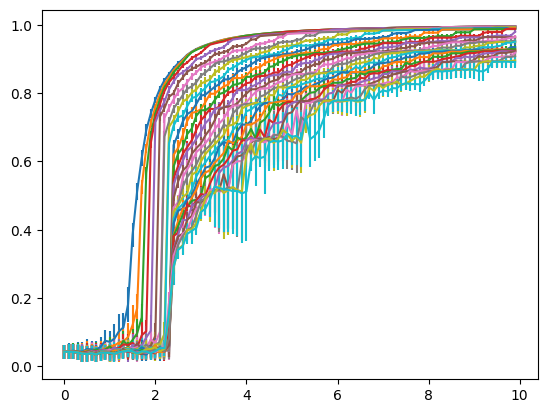

In [468]:
for i,m in enumerate(ms):
    plt.errorbar(Ks,r[i],std_[i])

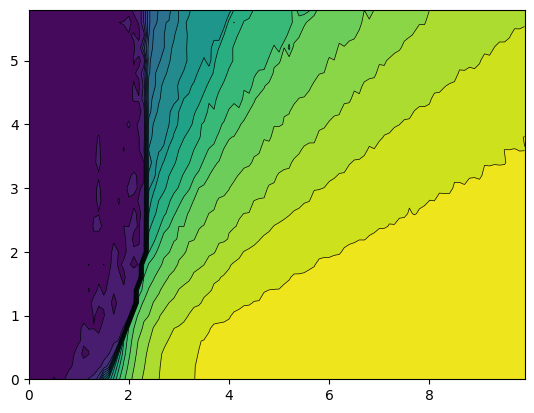

In [469]:
origin = 'lower'
CS = plt.contourf(KK,MM,r, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)

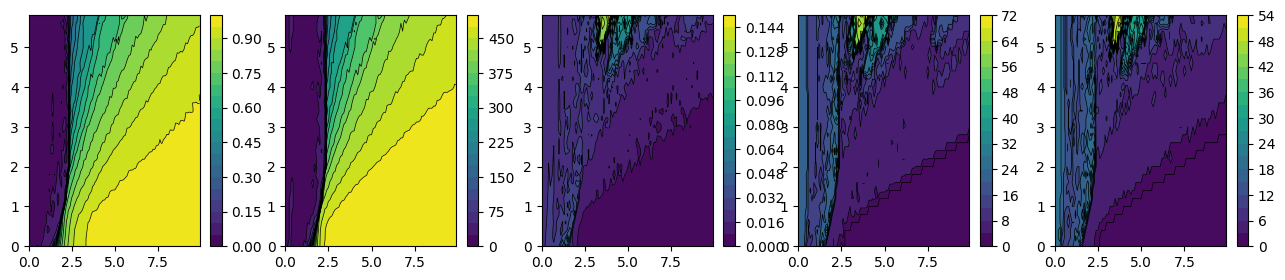

In [470]:
origin = 'lower'
fig = plt.figure(figsize=(16,3))
plt.subplot(151)
CS = plt.contourf(KK,MM,r, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(152)
CS = plt.contourf(KK,MM,g1, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(153)
CS = plt.contourf(KK,MM,std_, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(154)
CS = plt.contourf(KK,MM,g2, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(155)
CS = plt.contourf(KK,MM,g3, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

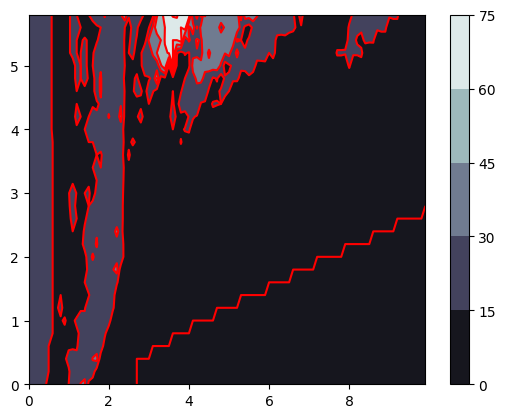

In [223]:
origin = 'lower'
CS = plt.contourf(KK,MM,g2, 4, cmap=plt.cm.bone, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='r', origin=origin)
plt.colorbar(CS)

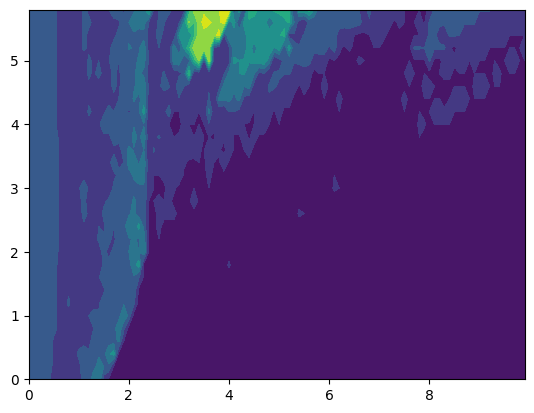

In [214]:
plt.contourf(KK,MM,g2,levels=10)

AttributeError: 'AxesSubplot' object has no attribute 'coutourf'

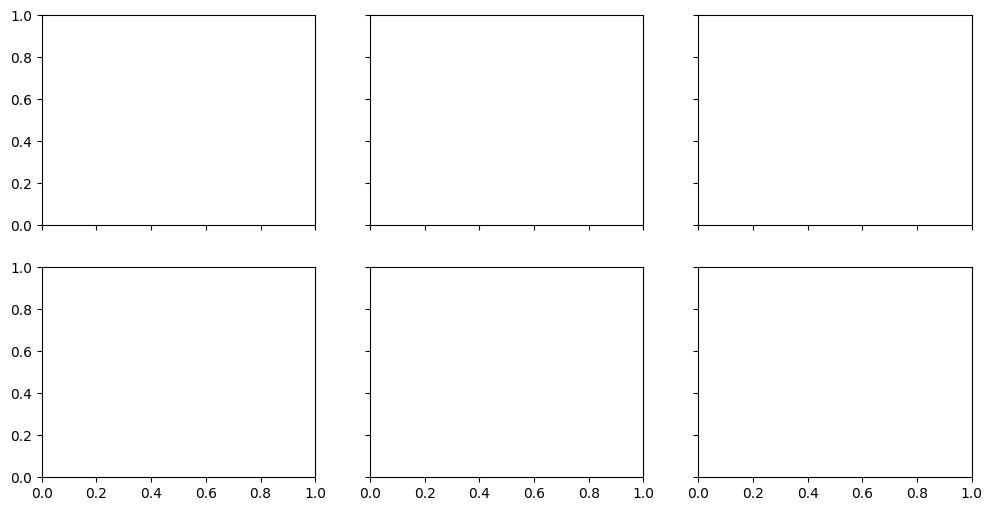

In [205]:
fig,ax = plt.subplots(2,3,figsize=(12,6),sharex=True,sharey=True)
im = ax[0,0].coutourf(MM,KK,r,origin='lower',extent=[Ks[0],Ks[-1],ms[0],ms[-1]],aspect='auto')
plt.colorbar(im)
ax[0,0].set_title('order parameter (r)')
im = ax[0,1].imshow(std_,origin='lower',extent=[Ks[0],Ks[-1],ms[0],ms[-1]],aspect='auto')
plt.colorbar(im)
ax[0,1].set_title('r std.')

im = ax[0,2].imshow(g1,origin='lower',extent=[Ks[0],Ks[-1],ms[0],ms[-1]],aspect='auto')
plt.colorbar(im)
ax[0,2].set_title('main group')

im = ax[1,0].imshow(g2,origin='lower',extent=[Ks[0],Ks[-1],ms[0],ms[-1]],aspect='auto')
plt.colorbar(im)
ax[1,0].set_title('second group')

im = ax[1,1].imshow(g3,origin='lower',extent=[Ks[0],Ks[-1],ms[0],ms[-1]],aspect='auto')
plt.colorbar(im)
ax[1,1].set_title('third group')

im = ax[1,2].imshow(g4,origin='lower',extent=[Ks[0],Ks[-1],ms[0],ms[-1]],aspect='auto')
plt.colorbar(im)
ax[1,2].set_title('fourth group')

for ax_ in ax:
    for ax__ in ax_:
        ax__.set_xlabel('K')
        ax__.set_ylabel('m')

plt.tight_layout()
# ax[3].imshow(g3,origin='lower')
# ax[0].imshow(g2)
# plt.imshow(std_)

## argsort로 위치가 얼마나 바뀌는지또한 확인해 보기

In [110]:
g4

array([[17, 18, 14, 10, 12, 12, 15, 15,  6,  5,  4,  3,  3,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [17, 18, 15,  9, 10, 10, 12, 17, 17, 17, 18,  5,  5,  4,  4,  4,
         3,  3,  3,  0,  0,  0,  0,  0,  0],
       [17, 17, 15, 14, 12, 10, 14, 12, 12, 13, 17, 16,  6,  6,  5,  5,
         4,  4,  5,  4,  4,  4,  4,  4,  4],
       [17, 18, 15, 12, 10, 12, 13, 10, 11, 14, 14, 14,  7,  6,  7,  6,
         5,  6,  6,  5,  5,  4,  4,  4,  5],
       [17, 18, 15, 12, 11, 14, 11, 10, 11, 13, 14, 18, 10,  8,  8,  6,
         7,  7,  7,  6,  8,  5,  6,  5,  6],
       [17, 18, 15, 12, 11, 11, 12, 12, 10, 14, 14, 14, 11, 11,  8,  8,
         9, 15, 17,  8,  7,  7,  7,  9,  6]])

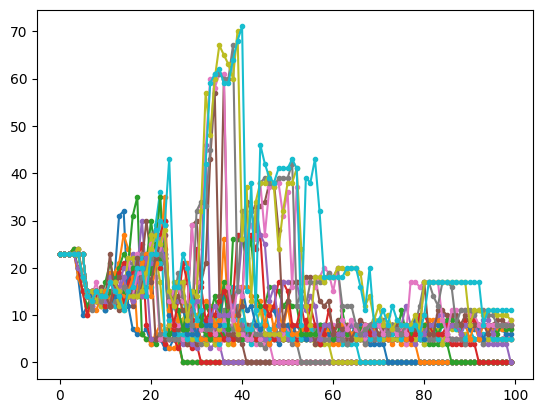

In [164]:
plt.plot(g2.T,'.-')

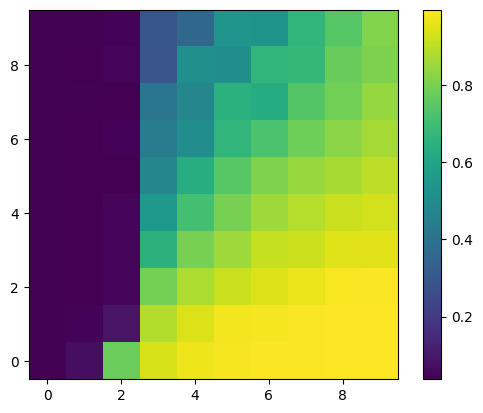

In [75]:
plt.imshow(A,origin='lower')
plt.colorbar()

In [91]:
sum_time = 500
dtheta_c = np.cumsum(dtheta,axis=0)
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
diff_avg_dtheta = np.diff(avg_dtheta,axis=1)

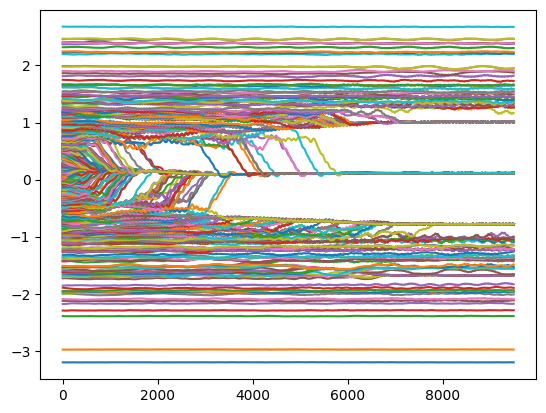

In [92]:
plt.plot(avg_dtheta);

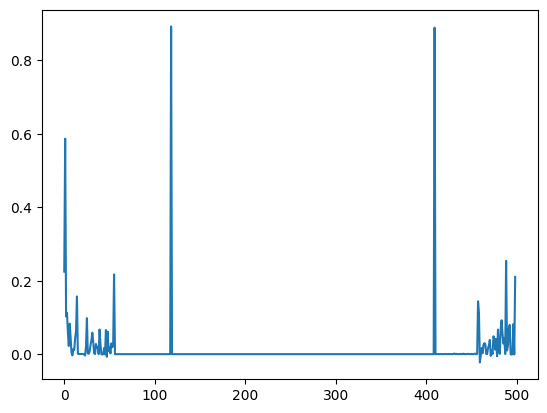

In [93]:
# plt.plot(avg_dtheta[-2])
plt.plot(diff_avg_dtheta[-2])

In [42]:
get_groups(dtheta)

[[500, nan, nan, nan, nan],
 [500, nan, nan, nan, nan],
 [500, nan, nan, nan, nan],
 [500, nan, nan, nan, nan],
 [500, nan, nan, nan, nan],
 [500, nan, nan, nan, nan],
 [500, nan, nan, nan, nan],
 [500, nan, nan, nan, nan],
 [500, nan, nan, nan, nan],
 [500, nan, nan, nan, nan],
 [500, nan, nan, nan, nan],
 [500, nan, nan, nan, nan],
 [500, nan, nan, nan, nan],
 [500, nan, nan, nan, nan],
 [500, nan, nan, nan, nan],
 [500, nan, nan, nan, nan],
 [500, nan, nan, nan, nan],
 [500, nan, nan, nan, nan],
 [500, nan, nan, nan, nan],
 [500, nan, nan, nan, nan],
 [500, nan, nan, nan, nan],
 [500, nan, nan, nan, nan],
 [500, nan, nan, nan, nan],
 [500, nan, nan, nan, nan],
 [500, nan, nan, nan, nan],
 [500, nan, nan, nan, nan],
 [500, nan, nan, nan, nan],
 [500, nan, nan, nan, nan],
 [500, nan, nan, nan, nan],
 [500, nan, nan, nan, nan],
 [500, nan, nan, nan, nan],
 [500, nan, nan, nan, nan],
 [500, nan, nan, nan, nan],
 [500, nan, nan, nan, nan],
 [500, nan, nan, nan, nan],
 [500, nan, nan, nan

## PEAKS 확인

In [437]:
seed =10
N = 500
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega)
m = 0.95
t = np.arange(0,2000,0.1)
K = 4
theta, dtheta,rs = mK((m,K),N=N,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)
sum_time = 500
dtheta_c = np.cumsum(dtheta,axis=0)
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
diff_avg_dtheta = np.diff(avg_dtheta,axis=1)

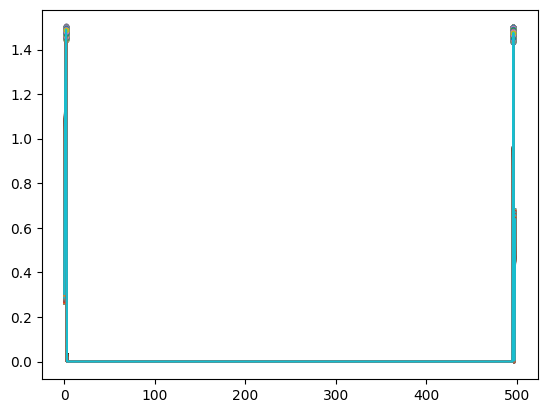

In [438]:

num_data = []
for data in avg_dtheta[-500:]:
    diff_dtheta = np.diff(data)
    peaks, _ = find_peaks(diff_dtheta, height=0.01)
    num_data.append(np.diff(peaks))
    plt.plot(peaks,diff_dtheta[peaks],'.')
    plt.plot(diff_dtheta)
main_ = []

for diff in num_data:
    # plt.hist(diff,bins=20)
    # print(diff[np.where(diff>5)])
    sort_re = np.sort(diff)[::-1]
    sort_re = np.argsort(diff)[::-1]
    # sort_re = np.sort(diff)
    # print(sort_re)
    temp = []
    for i in sort_re[:5]:
        temp.append(i)
    for i in range(5- len(sort_re)):
        temp.append(np.NAN)
    main_.append(temp)


In [439]:
b = np.zeros([len(num_data),len(max(num_data,key = lambda x: len(x)))])
for i,j in enumerate(num_data):
    b[i][0:len(j)] = j

In [440]:
sort_b = np.sort(b,axis=1)[:,::-1]
sort_b_idx = np.argsort(b,axis=1)[:,::-1]
# np.sort(b,axis=1)

In [441]:
temp = np.argsort(np.std(sort_b,axis=0))

In [442]:
sort_b

array([[494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [494.],
       [49

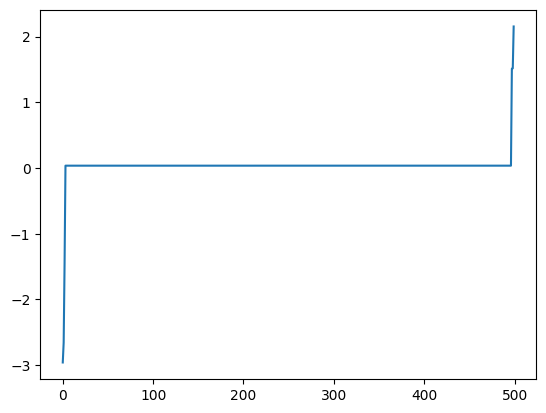

In [443]:
plt.plot(avg_dtheta[-1])

In [434]:

num_data = []
for data in avg_dtheta[-500:]:
    diff_dtheta = np.diff(data)
    peaks, _ = find_peaks(diff_dtheta, height=0.01)
    num_data.append(np.diff(peaks))
main_ = []

for diff in num_data:
    # plt.hist(diff,bins=20)
    # print(diff[np.where(diff>5)])
    sort_re = np.sort(diff)[::-1]
    # sort_re = np.sort(diff)
    # print(sort_re)
    temp = []
    for i in sort_re[:5]:
        temp.append(i)
    for i in range(5- len(sort_re)):
        temp.append(np.NAN)
    main_.append(temp)

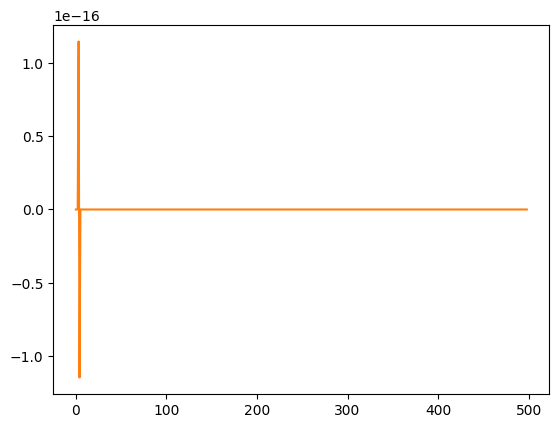

In [435]:
plt.plot(peaks,diff_dtheta[peaks],'.')
plt.plot(diff_dtheta)

In [411]:
(np.std(sort_b,axis=0))/(np.max(sort_b,axis=0)/N)

array([ 0.        , 17.05872211, 21.32340264,  0.        ,  0.        ])

In [386]:
sort_b[10],sort_b[-1]

(array([28., 23., 15., 14., 13., 13., 12.,  8.,  8.,  8.,  8.,  8.,  7.,
         7.,  7.,  7.,  7.,  7.,  6.,  6.,  6.,  6.,  5.,  5.,  5.,  5.,
         5.,  5.,  5.,  5.,  5.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
         4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  3.,
         3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
         3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
         3.,  3.,  3.,  3.,  3.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
         2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
         2.,  2.,  2.,  2.,  0.,  0.,  0.]),
 array([24., 23., 13., 13., 13., 13., 13., 12., 10., 10.,  8.,  8.,  7.,
         7.,  7.,  7.,  7.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  5.,  5.,
         5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  4.,  4.,
         4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
         4.,  4.,  4.,  4.,  4.,  4.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
      

In [ ]:

num_data = []
for data in avg_dtheta[-500:]:
    diff_dtheta = np.diff(data)
    peaks, _ = find_peaks(diff_dtheta, height=0.01)
    num_data.append(np.diff(peaks))
main_ = []

for diff in num_data:
    # plt.hist(diff,bins=20)
    # print(diff[np.where(diff>5)])
    sort_re = np.sort(diff)[::-1]
    # sort_re = np.sort(diff)
    # print(sort_re)
    temp = []
    for i in sort_re[:5]:
        temp.append(i)
    for i in range(5- len(sort_re)):
        temp.append(np.NAN)
    main_.append(temp)

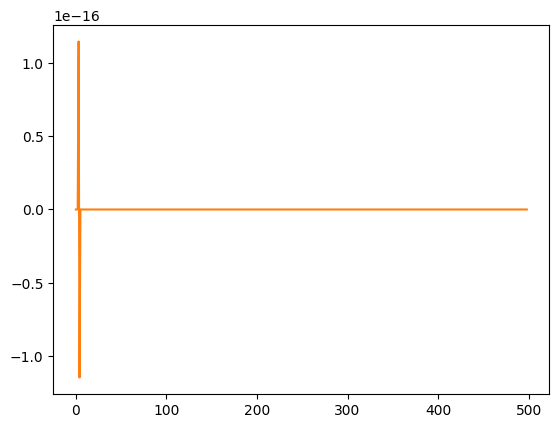

In [436]:
plt.plot(peaks,diff_dtheta[peaks],'.')
plt.plot(diff_dtheta)

In [338]:
np.where(temp == 0)

(array([0]),)

In [342]:
sort_b

array([[387.,   6.,   6., ...,   0.,   0.,   0.],
       [387.,   6.,   6., ...,   0.,   0.,   0.],
       [387.,   8.,   6., ...,   0.,   0.,   0.],
       ...,
       [387.,   6.,   6., ...,   0.,   0.,   0.],
       [387.,   6.,   6., ...,   0.,   0.,   0.],
       [387.,   6.,   6., ...,   0.,   0.,   0.]])

In [336]:
sort_b[temp]

array([[387.,   6.,   6., ...,   0.,   0.,   0.],
       [387.,   6.,   5., ...,   0.,   0.,   0.],
       [387.,   6.,   5., ...,   2.,   2.,   0.],
       ...,
       [387.,   6.,   6., ...,   0.,   0.,   0.],
       [387.,   6.,   5., ...,   2.,   2.,   0.],
       [387.,   8.,   6., ...,   2.,   0.,   0.]])

In [311]:
np.sort(np.array(num_data),axis=0)

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_52969/3247268276.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.sort(np.array(num_data),axis=0)


ValueError: operands could not be broadcast together with shapes (99,) (101,) 

In [ ]:
sort_re = np.sort()[::-1]
sort_re = np.argsort(diff)[::-1]